In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Setup

In [24]:
df = pd.read_csv('/content/Sunshine hours for cities in the world.csv')
df.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0


In [26]:
df = df.rename(columns={'Year': 'Avg_Year'})
df.head()
#renaming columns for easier recall and future analysis

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Year
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0


In [28]:
df.shape
#checking the shape of the dataset

(392, 15)

In [29]:
df.info()
#checking the datatypes to see if any need to be altered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   392 non-null    object 
 1   City      392 non-null    object 
 2   Jan       392 non-null    float64
 3   Feb       392 non-null    float64
 4   Mar       392 non-null    float64
 5   Apr       392 non-null    float64
 6   May       392 non-null    float64
 7   Jun       392 non-null    float64
 8   Jul       392 non-null    float64
 9   Aug       392 non-null    float64
 10  Sep       392 non-null    float64
 11  Oct       392 non-null    float64
 12  Nov       392 non-null    float64
 13  Dec       392 non-null    float64
 14  Avg_Year  392 non-null    float64
dtypes: float64(13), object(2)
memory usage: 46.1+ KB


In [30]:
df.isnull().sum()
#identifying null entries

Country     0
City        0
Jan         0
Feb         0
Mar         0
Apr         0
May         0
Jun         0
Jul         0
Aug         0
Sep         0
Oct         0
Nov         0
Dec         0
Avg_Year    0
dtype: int64

In [31]:
df.duplicated().sum()
#identifying duplicated entries

0

In [112]:
df_continents = pd.read_csv('continents.csv')
df_continents
#loading second dataset to merge with first

,Entity,Code,Year,Continent
0,Abkhazia,OWID_ABK,2015,Asia
1,Afghanistan,AFG,2015,Asia
2,Akrotiri and Dhekelia,OWID_AKD,2015,Asia
3,Aland Islands,ALA,2015,Europe
4,Albania,ALB,2015,Europe
...,...,...,...,...
280,Yemen People's Republic,OWID_YPR,2015,Asia
281,Yugoslavia,OWID_YGS,2015,Europe
282,Zambia,ZMB,2015,Africa
283,Zanzibar,OWID_ZAN,2015,Africa


In [113]:
df_continents = df_continents.drop(columns=['Year', 'Code'])
df_continents = df_continents.rename(columns={'Entity': 'Country'})
#renaming and removing columns for easier recall and merging

In [115]:
df_continents.head()

,Country,Continent
0,Abkhazia,Asia
1,Afghanistan,Asia
2,Akrotiri and Dhekelia,Asia
3,Aland Islands,Europe
4,Albania,Europe


# Data Analysis

In [32]:
df.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Year
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0,1823.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0,2092.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0,2296.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6,2638.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0,2757.0


In [34]:
country_mean = df.groupby('Country')['Avg_Year'].mean().reset_index().round({'Avg_Year': 2})
country_mean
#finding country average sunlight hours

,Country,Avg_Year
0,Afghanistan,3175.10
1,Albania,2544.00
2,Algeria,3266.50
3,Angola,2341.00
4,Argentina,2220.30
...,...,...
136,Uzbekistan,2823.90
137,Venezuela,2895.30
138,Vietnam,2123.50
139,Zambia,2965.47


In [174]:
min_sunlight_country = country_mean.loc[country_mean['Avg_Year'].idxmin()]

max_sunlight_country = country_mean.loc[country_mean['Avg_Year'].idxmax()]

print("Country with Minimum Hours of Sunlight:")
print(min_sunlight_country[['Country', 'Avg_Year']])

print("\nCountry with Maximum Hours of Sunlight:")
print(max_sunlight_country[['Country', 'Avg_Year']])
#calculating min and max values

Country with Minimum Hours of Sunlight:
Country     Faroe Islands
Avg_Year            840.0
Name: 42, dtype: object

Country with Maximum Hours of Sunlight:
Country     Namibia
Avg_Year     3737.5
Name: 87, dtype: object


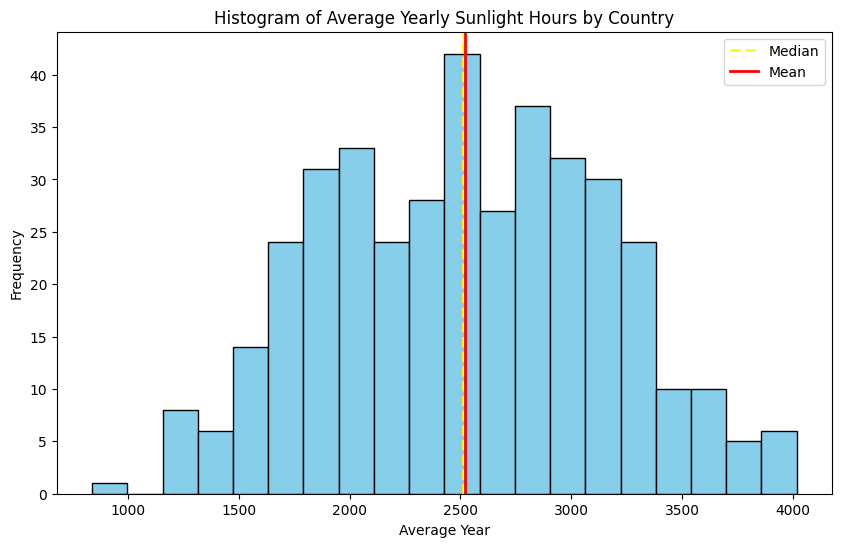

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(df['Avg_Year'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Average Year')
plt.ylabel('Frequency')
plt.title('Histogram of Average Yearly Sunlight Hours by Country')

median_value = df['Avg_Year'].median()
mean_value = df['Avg_Year'].mean()

plt.axvline(median_value, color='yellow', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_value, color='red', linestyle='solid', linewidth=2, label='Mean')

plt.legend()
plt.show()
#plotting histogram to show distribution of countries and their average sunlight hours with mean and media reference lines

In [166]:
min_value = df['Avg_Year'].min()
max_value = df['Avg_Year'].max()
#finding min and max values

country_mean = df.groupby('Country')['Avg_Year'].mean().reset_index().round({'Avg_Year': 2})

(840.0, 4015.3)

In [45]:
average_per_month = df.groupby('Country')[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean().reset_index()
print(average_per_month)
#calculating average of sunlight hours per month per country

         Country         Jan         Feb         Mar         Apr         May  \
0    Afghanistan  177.200000  178.600000  204.500000  232.500000  310.300000   
1        Albania  124.000000  125.000000  165.000000  191.000000  263.000000   
2        Algeria  223.300000  220.250000  262.200000  292.500000  323.800000   
3         Angola  219.000000  208.000000  213.000000  199.000000  233.000000   
4      Argentina  238.250000  207.066667  185.050000  170.616667  151.466667   
..           ...         ...         ...         ...         ...         ...   
136   Uzbekistan  117.800000  127.100000  164.300000  216.000000  303.800000   
137    Venezuela  259.133333  243.900000  261.700000  224.666667  217.400000   
138      Vietnam  178.250000  168.000000  190.500000  185.000000  203.500000   
139       Zambia  180.833333  168.933333  221.133333  254.000000  286.233333   
140     Zimbabwe  230.950000  201.600000  241.800000  250.500000  274.350000   

            Jun         Jul     Aug    

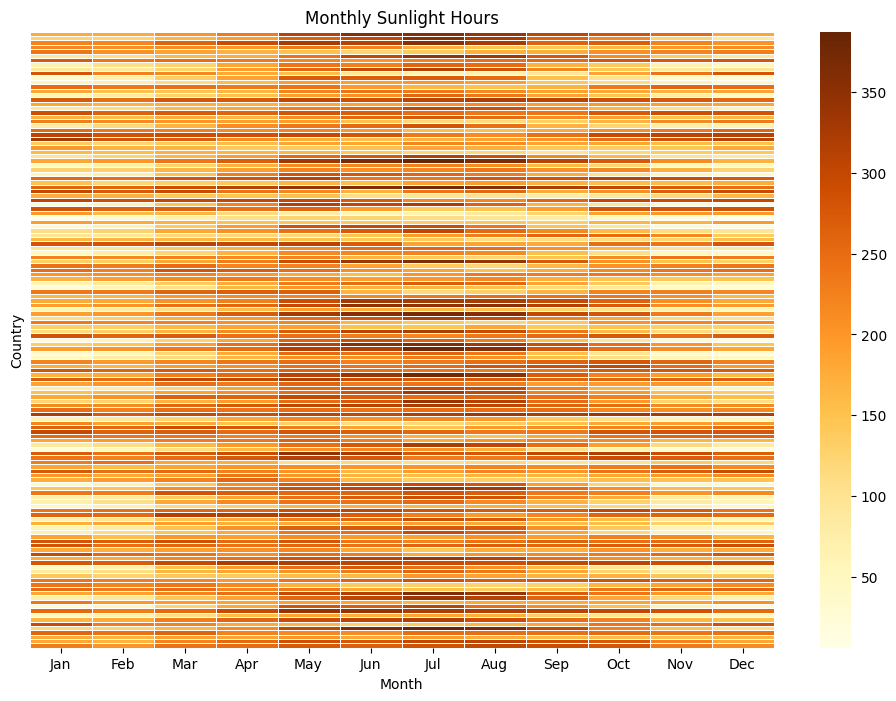

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(average_per_month, cmap='YlOrBr', fmt=".2f", linewidths=.5)
plt.xlabel('Month')
plt.yticks([])
plt.title('Monthly Sunlight Hours')
plt.show()
#plotting a heatmap to identify which months have the most sunlight across entire dataset

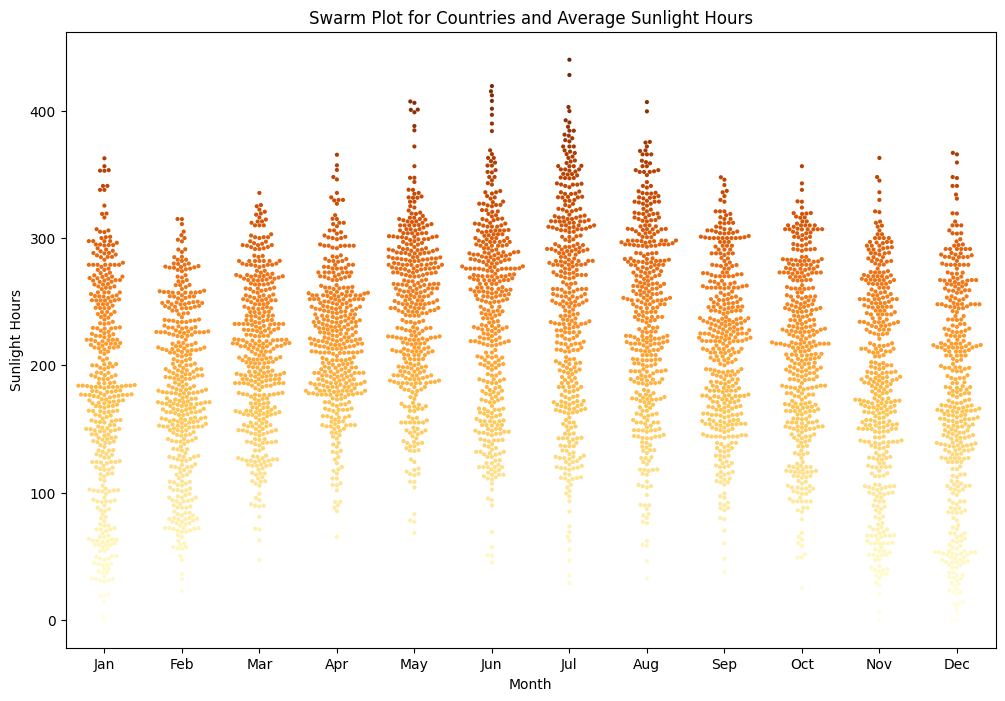

In [99]:
melted_df = pd.melt(df, id_vars=['Country'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], var_name='Month', value_name='Value')

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Month', y='Value', hue='Value',data=melted_df, palette='YlOrBr', size=3, legend = False)

plt.xlabel('Month')
plt.ylabel('Sunlight Hours')
plt.title('Swarm Plot for Countries and Average Sunlight Hours')

plt.show()
#plotting swarmplot to visualise the sunlight hours across each month with each point as an individual country

In [117]:
df_merged = pd.merge(df_continents, country_mean, on='Country', how='inner')
df_merged
#merging continents dataset with main dataset

,Country,Continent,Avg_Year
0,Afghanistan,Asia,3175.10
1,Albania,Europe,2544.00
2,Algeria,Africa,3266.50
3,Angola,Africa,2341.00
4,Argentina,South America,2220.30
...,...,...,...
131,Uzbekistan,Asia,2823.90
132,Venezuela,South America,2895.30
133,Vietnam,Asia,2123.50
134,Zambia,Africa,2965.47


In [152]:
continents_avg = df_merged.groupby('Continent')['Avg_Year'].mean().sort_values(ascending=False)
continents_avg
#calculating continent yearly average hours

Continent
Africa           2873.634286
Asia             2541.868519
North America    2516.988750
Oceania          2331.498000
South America    2305.987692
Europe           2033.280732
Name: Avg_Year, dtype: float64

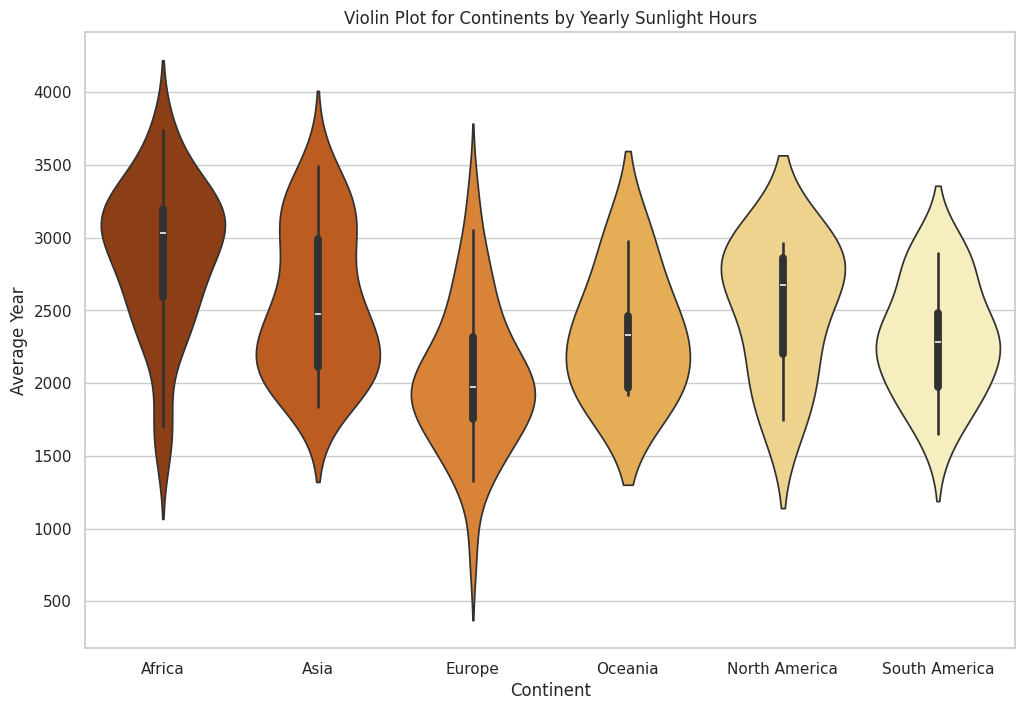

In [141]:
continent_order = df_merged.groupby('Continent')['Avg_Year'].max().sort_values(ascending=False).index

sns.set(style="whitegrid")

hue_order = df_merged.groupby('Continent')['Avg_Year'].max().sort_values(ascending=True).index
plt.figure(figsize=(12, 8))
sns.violinplot(x='Continent', y='Avg_Year', hue='Continent', data=df_merged, palette='YlOrBr', order=continent_order, hue_order=hue_order)

plt.xlabel('Continent')
plt.ylabel('Average Year')
plt.title('Violin Plot for Continents by Yearly Sunlight Hours')

plt.show()
#creating violinplot to visualise the distribution of continents and the countries within continent

# Summary


Through the data analysis average sunlight hours is 2522.01. additionally may through august are the months with the most hours of sunlight. Africa and Asia are experience the most hours of sunlight with an average of 2873.63 hours per country in Africa, and 2541.87 hours per country in Asia.
